> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: The Analysis of IMDB Movies Set 
<p>
In this project we will go through the list of 10,000 movies rated by IMDB to find some interesting data patterns to learn more about the best movies year to year,budget and some of the best directors out there 
</p>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling
> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
<p> 
In This analysis for movie lists from tmdb we will try and answer 6 questions which are:</br>
    <ol>
        <li>Which year has the highest number of short movies released?</li>
        <li>Which year made the highest revenue in movies?</li>
        <li>What movie got the highest profit?</li>
        <li>How many movies are in each genre?</li>
        <li>How does runtime affects the Profits of a movie?</li>
        <li>Does Popular Movies bring high profits?</li>
    </ol>
</p>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Dropping unused columns

In [4]:
df.drop(['tagline','keywords','overview','homepage','production_companies','cast','vote_count'], axis = 1, inplace = True)

In [5]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.3,2015,1.747999e+08,1.385749e+09


#### Removing Null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   imdb_id         10856 non-null  object 
 2   popularity      10866 non-null  float64
 3   budget          10866 non-null  int64  
 4   revenue         10866 non-null  int64  
 5   original_title  10866 non-null  object 
 6   director        10822 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_average    10866 non-null  float64
 11  release_year    10866 non-null  int64  
 12  budget_adj      10866 non-null  float64
 13  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


#### Since many Null values are for Directors and generes we can drop them to maintain our data easily

In [7]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10796 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10796 non-null  int64  
 1   imdb_id         10796 non-null  object 
 2   popularity      10796 non-null  float64
 3   budget          10796 non-null  int64  
 4   revenue         10796 non-null  int64  
 5   original_title  10796 non-null  object 
 6   director        10796 non-null  object 
 7   runtime         10796 non-null  int64  
 8   genres          10796 non-null  object 
 9   release_date    10796 non-null  object 
 10  vote_average    10796 non-null  float64
 11  release_year    10796 non-null  int64  
 12  budget_adj      10796 non-null  float64
 13  revenue_adj     10796 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)
Now we should know if there any duplicates to remove

### Drop any Duplicates

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.value_counts().sum()

10796

### So we don't have any duplicates

### Change the format of Date

In [10]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [11]:
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10796, dtype: datetime64[ns]

### Adding the profit Column

In [12]:
df.insert(14,'profit',df['revenue']-df['budget'])

In [13]:
df.shape

(10796, 15)

In [14]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,1316249360


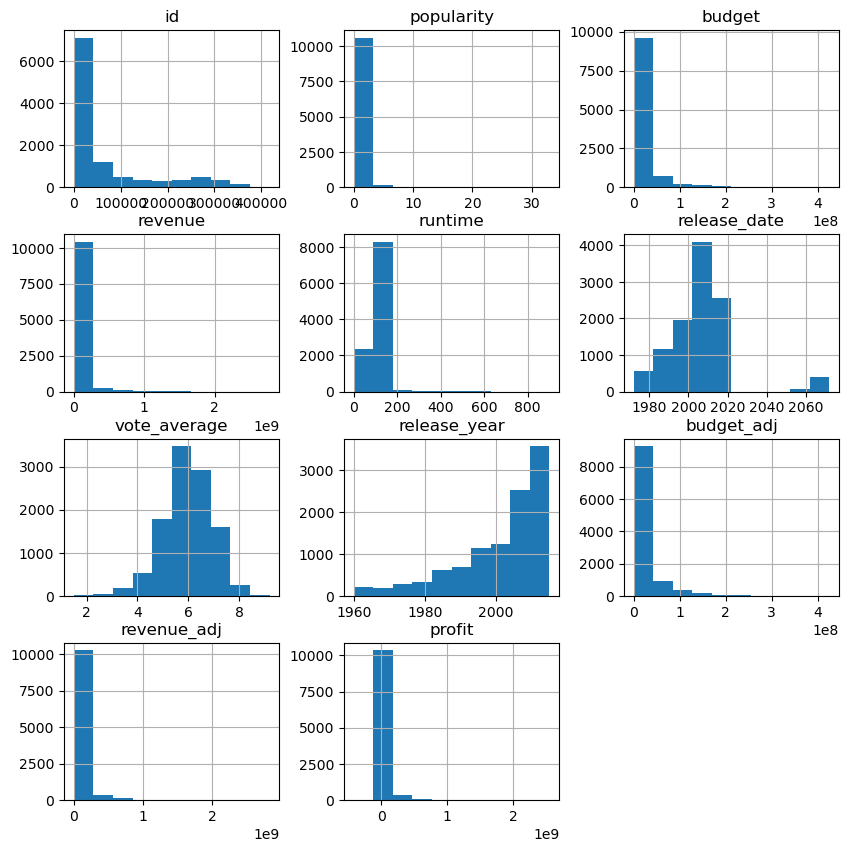

In [15]:
df.hist(figsize=(10,10));

In [16]:
def drw(c1,c2):
    diag= sns.regplot(x=df[c1],y=df[c2])
    diag.set_title("{} VS {}".format(c1,c2),fontsize=15)
    diag.set_xlabel(c1,fontsize=10)
    diag.set_ylabel(c2,fontsize=10)
    plt.figure(figsize=(12,6));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1- Which year has the highest number of short movies released?

#### To find the answer for that question we need to know how much is a short movie for our analysis it will be just smaller than the mean of runtime

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
time_mean = df['runtime'].mean()
df_Short = df.query('runtime<{}'.format(time_mean))

#### now we have the list of movies where the runtime is smaller than the mean 

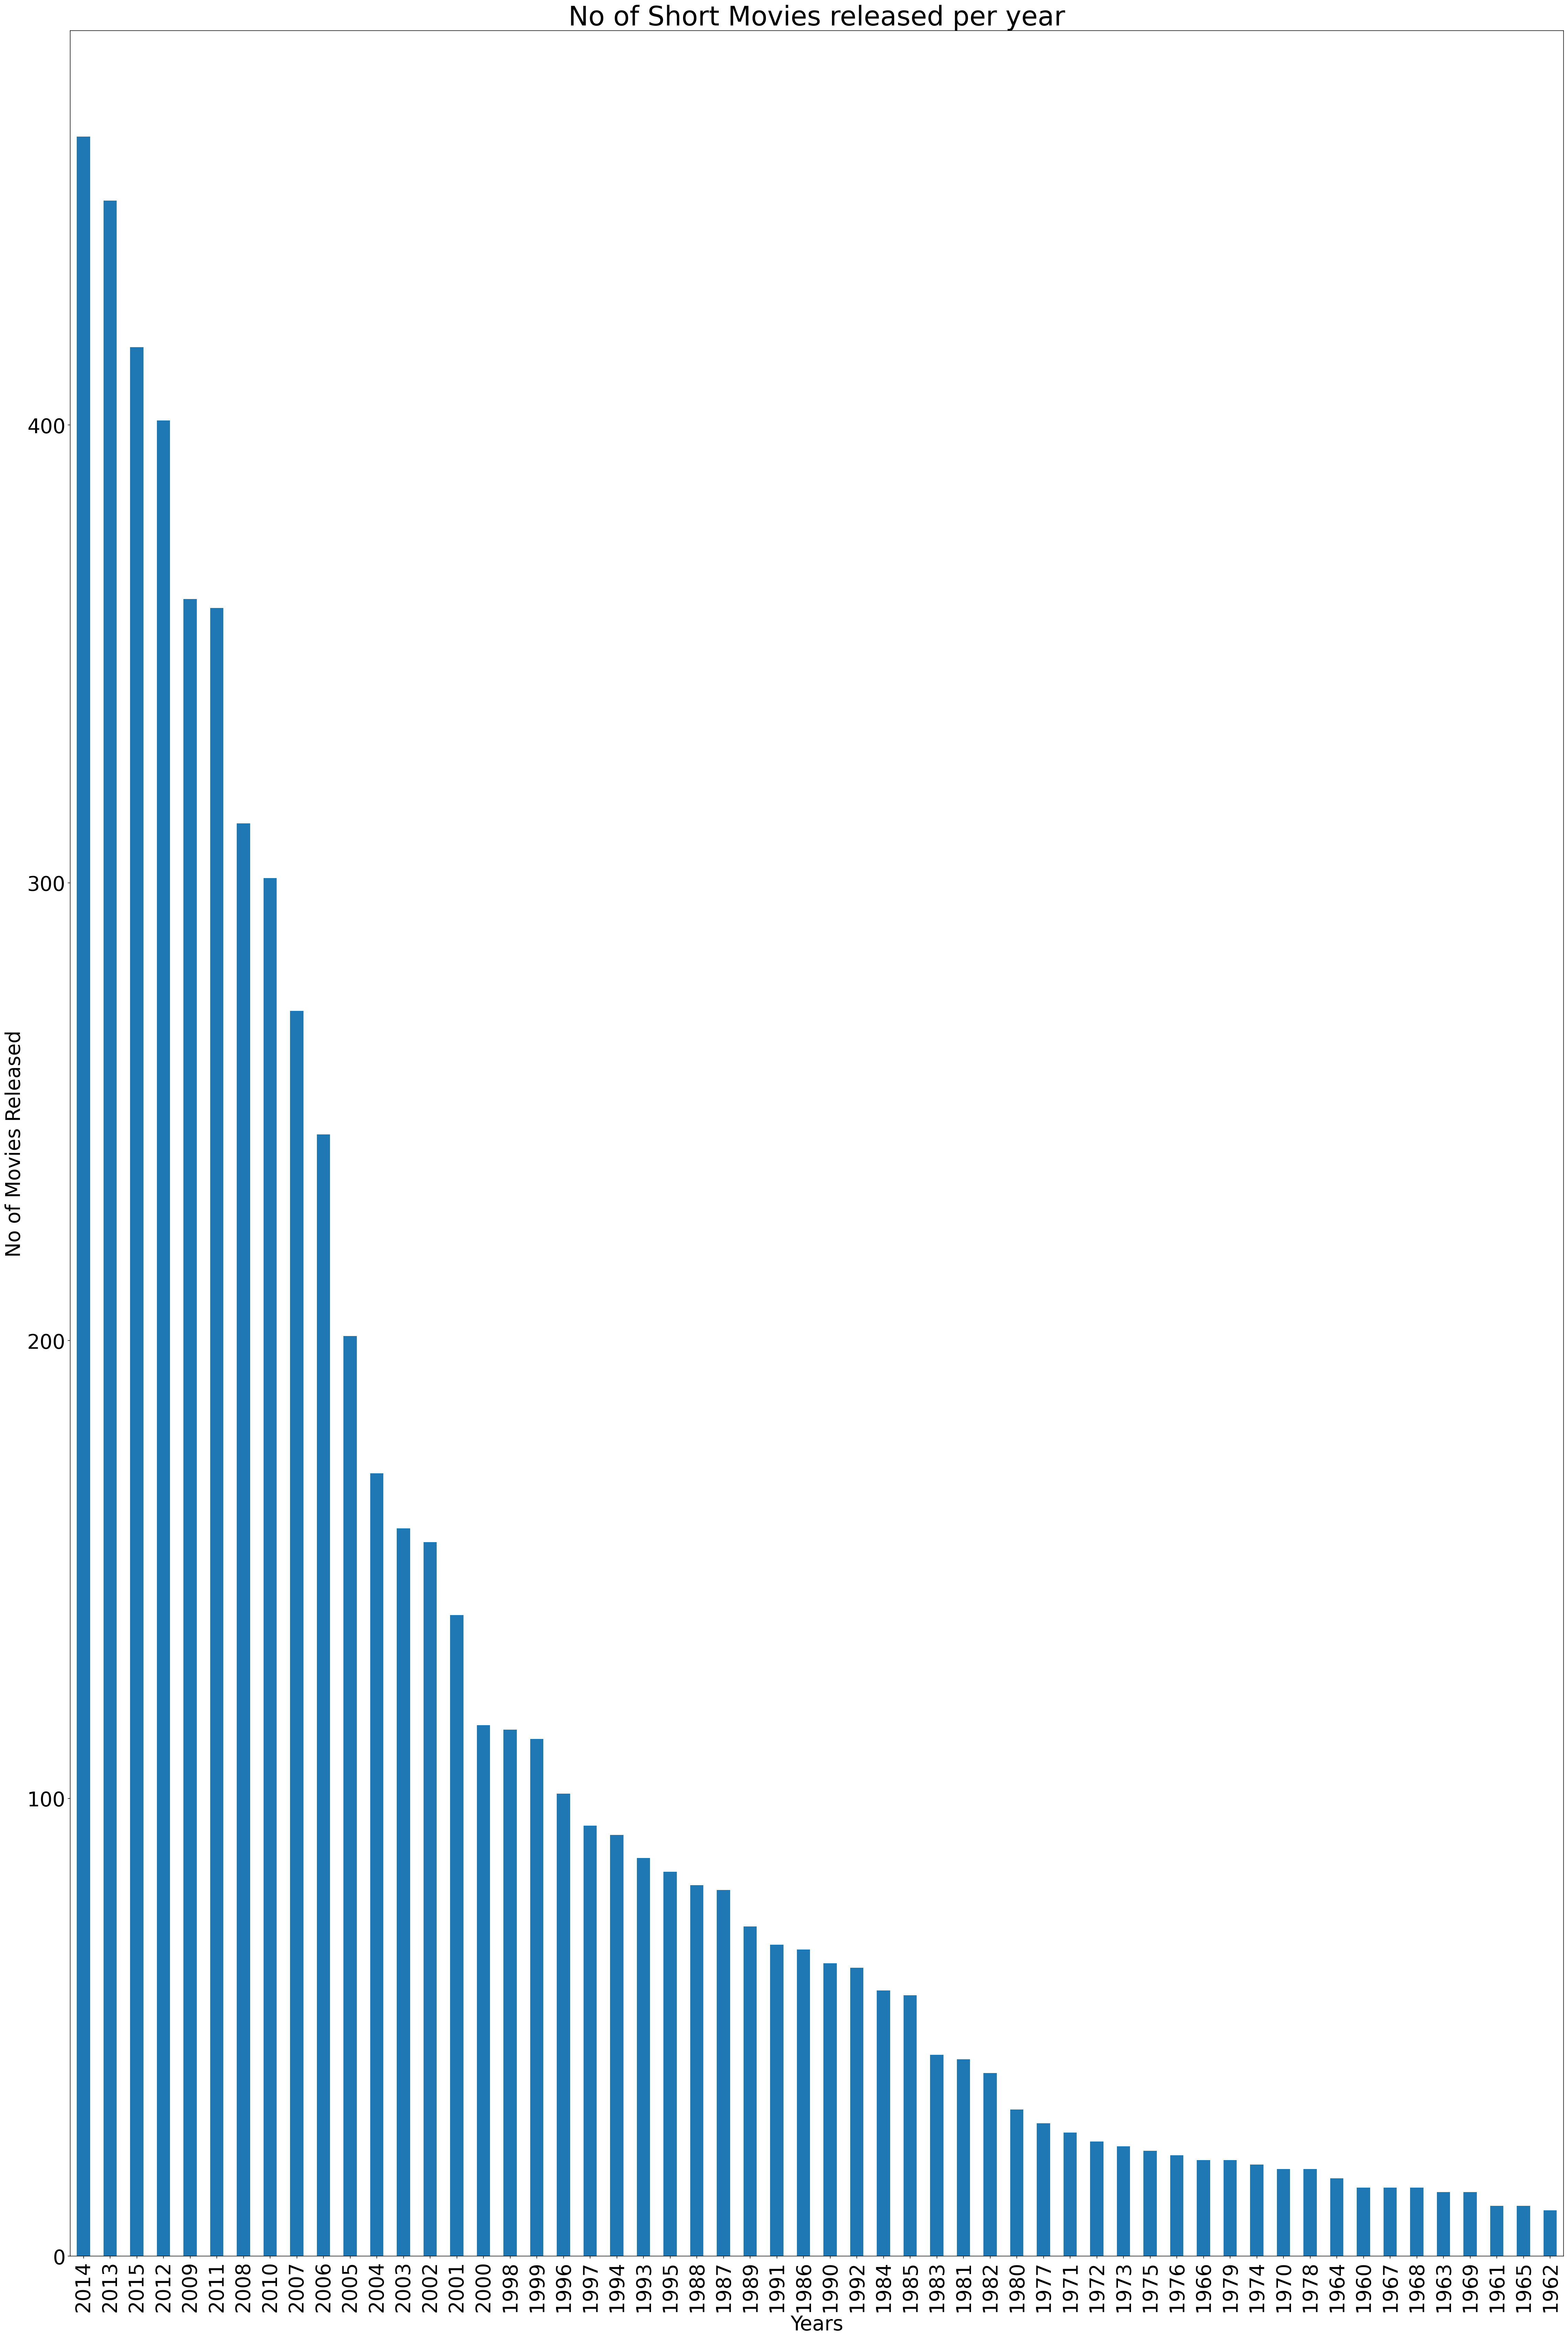

In [18]:
plt.figure(figsize=(40,60), dpi = 140)
plt.rc('xtick', labelsize= 30) 
plt.rc('ytick', labelsize= 30)
#plt.rc('axes', labelsize= 40)
df_Short.release_year.value_counts().plot(kind='bar')
plt.title('No of Short Movies released per year',size = 40)
plt.ylabel('No of Movies Released',size = 30)
plt.xlabel('Years',size = 30);

#### So the graph Shows that the highest number of Short movies was produced at 2014

In [19]:
print("The Most number of short movies produced was in {} ".format(df_Short.release_year.mode()));

The Most number of short movies produced was in 0    2014
Name: release_year, dtype: int64 


In [20]:
print('The Number of movies produced is: {} '.format(df_Short.release_year.value_counts().max()))

The Number of movies produced is: 463 


#### So that is the Answer for our question as shown in the graph
<hr>

### Q2- What year made the highest revenue in movies?

#### To find that we need to sum the revenues of each year

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_high_rev = df.groupby('release_year')['revenue'].sum()

#### We will Graph the Relation to find it more easily

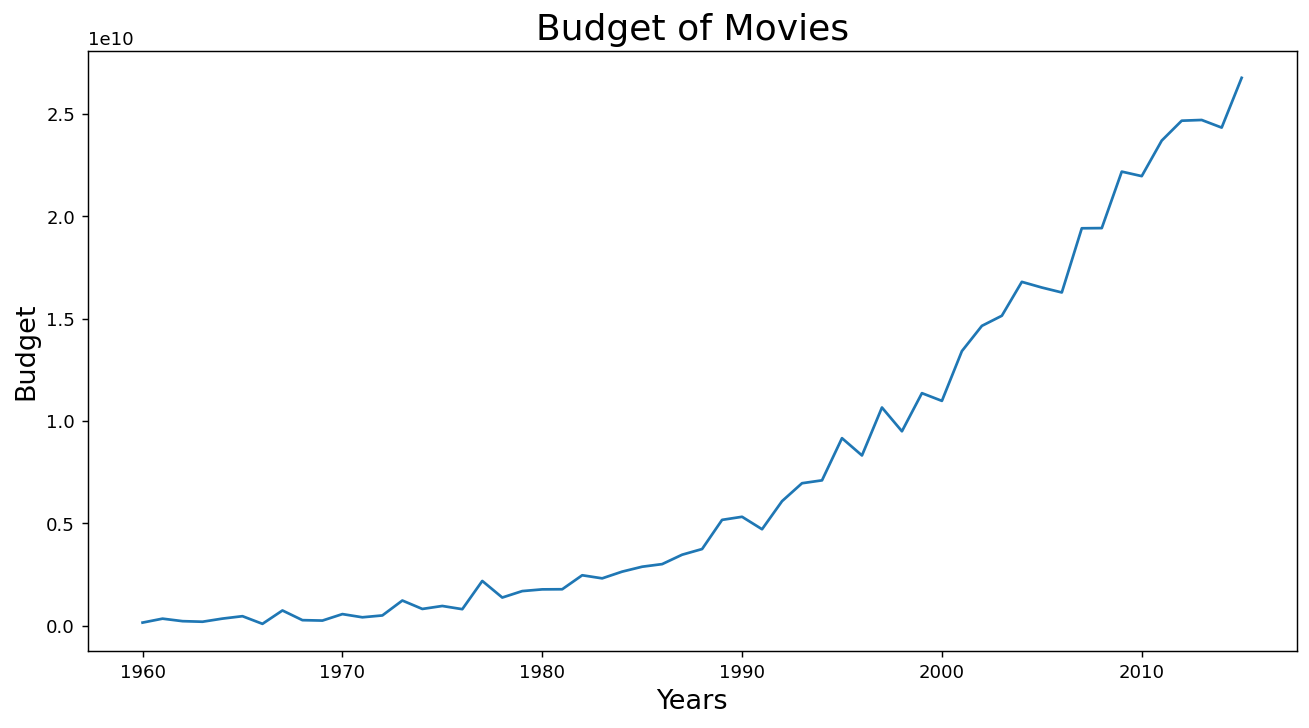

In [22]:
plt.figure(figsize=(12,6), dpi = 130)
plt.rc('xtick', labelsize= 10) 
plt.rc('ytick', labelsize= 10)
plt.plot(df_high_rev)
plt.title('Budget of Movies',size=20)
plt.xlabel('Years',size=15)
plt.ylabel('Budget',size=15);

#### So the graph Shows that the year we are looking for is 2015

In [23]:
print('The highest revenue was achieved on year: {}'.format(df_high_rev.idxmax()))

The highest revenue was achieved on year: 2015


#### So that is the year with the highest revenue on our list
<hr>

In [24]:
print('The Highest revenue in a year is: {}'.format(df_high_rev.max()))

The Highest revenue in a year is: 26762450518


### Q3- What movie got the highest profit?

In [25]:
highest = df['profit'].idxmax()
df['original_title'].loc[highest]

'Avatar'

#### to get Most 10 Profitable Movies

In [26]:
df_Pro= pd.DataFrame(df['profit'].sort_values(ascending=False))
df_Pro =df_Pro.join(df['original_title'])
title = df_Pro[0:10].original_title

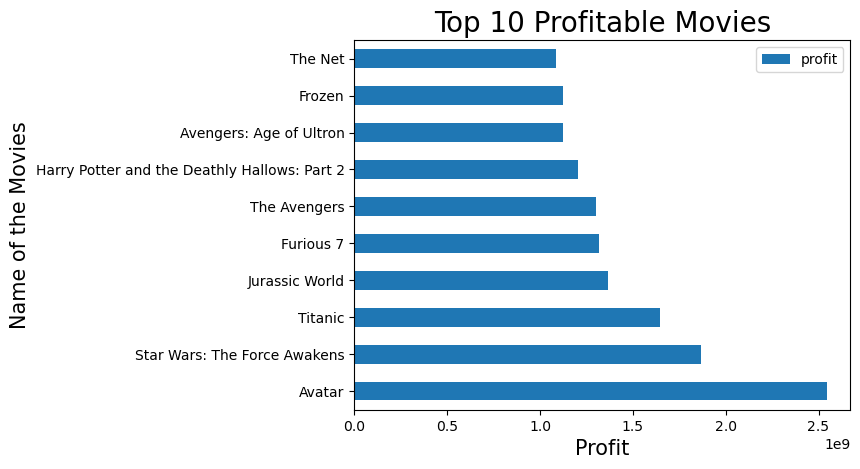

In [27]:
df_Pro[0:10].plot(kind = 'barh')
plt.title('Top 10 Profitable Movies',size = 20)
plt.yticks(np.arange(10),title) 
plt.xlabel('Profit',size=15)
plt.ylabel('Name of the Movies',size=15);

### Q4- How many movies are in each genre?

In [28]:
Genres = pd.Series(df['genres'].str.cat(sep='|').split('|'))
Genres.value_counts(ascending= False)

Drama              4753
Comedy             3782
Thriller           2905
Action             2374
Romance            1708
Horror             1636
Adventure          1464
Crime              1354
Family             1222
Science Fiction    1220
Fantasy             909
Mystery             809
Animation           690
Documentary         509
Music               402
History             332
War                 270
Foreign             185
Western             164
TV Movie            162
dtype: int64

#### So we got that most genres we can found is Drama

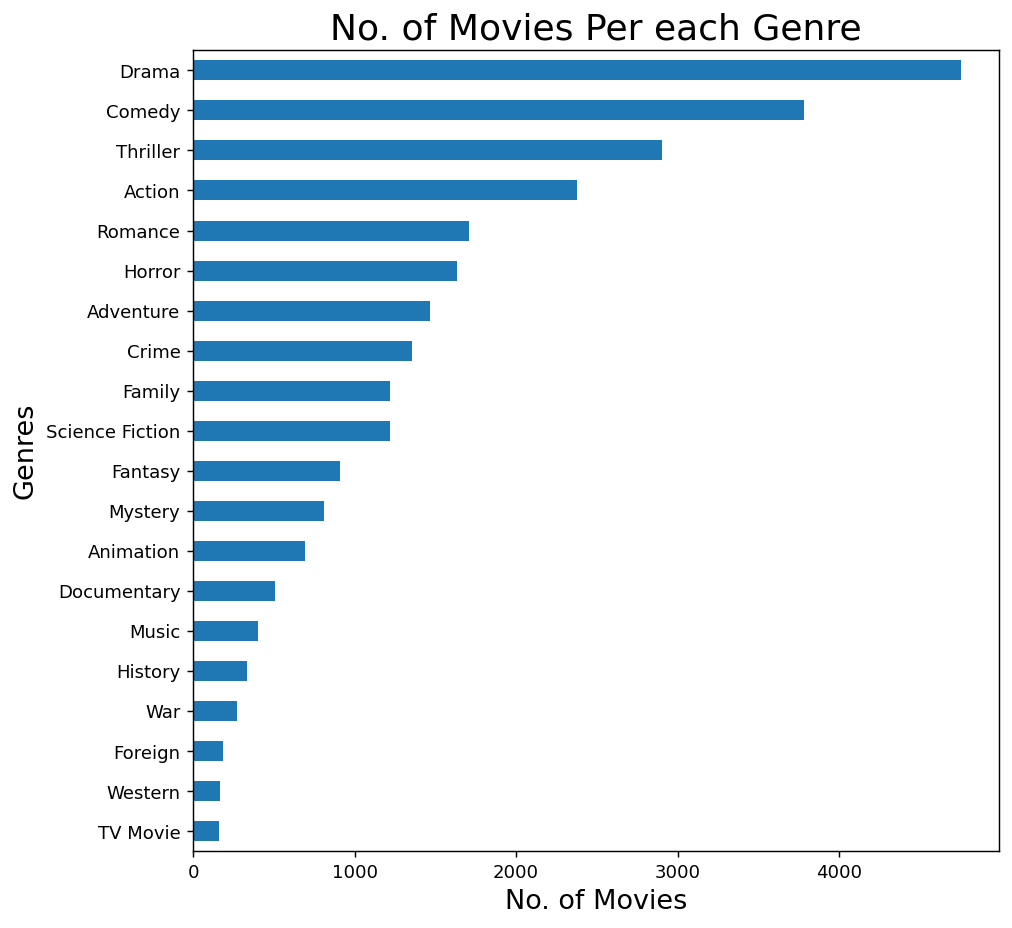

In [29]:
plt.figure(figsize=(8,8), dpi = 130)
plt.title('No. of Movies Per each Genre',size = 20)
plt.xlabel('No. of Movies',size=15)
plt.ylabel('Genres',size=15)
Genres.value_counts(ascending = True).plot(kind = 'barh');

### Q5- How does runtime affects the Profits of a movie?

In [30]:
df_run_pro=df.groupby('runtime')['profit'].sum()
df_run_pro.describe()

count    2.450000e+02
mean     1.117547e+09
std      1.818750e+09
min     -1.200000e+08
25%      0.000000e+00
50%      7.999893e+06
75%      1.645034e+09
max      7.768697e+09
Name: profit, dtype: float64

#### As we can see that more than 50% of the profits where based on runtime which is within 50% to 70% of the highest runtime  

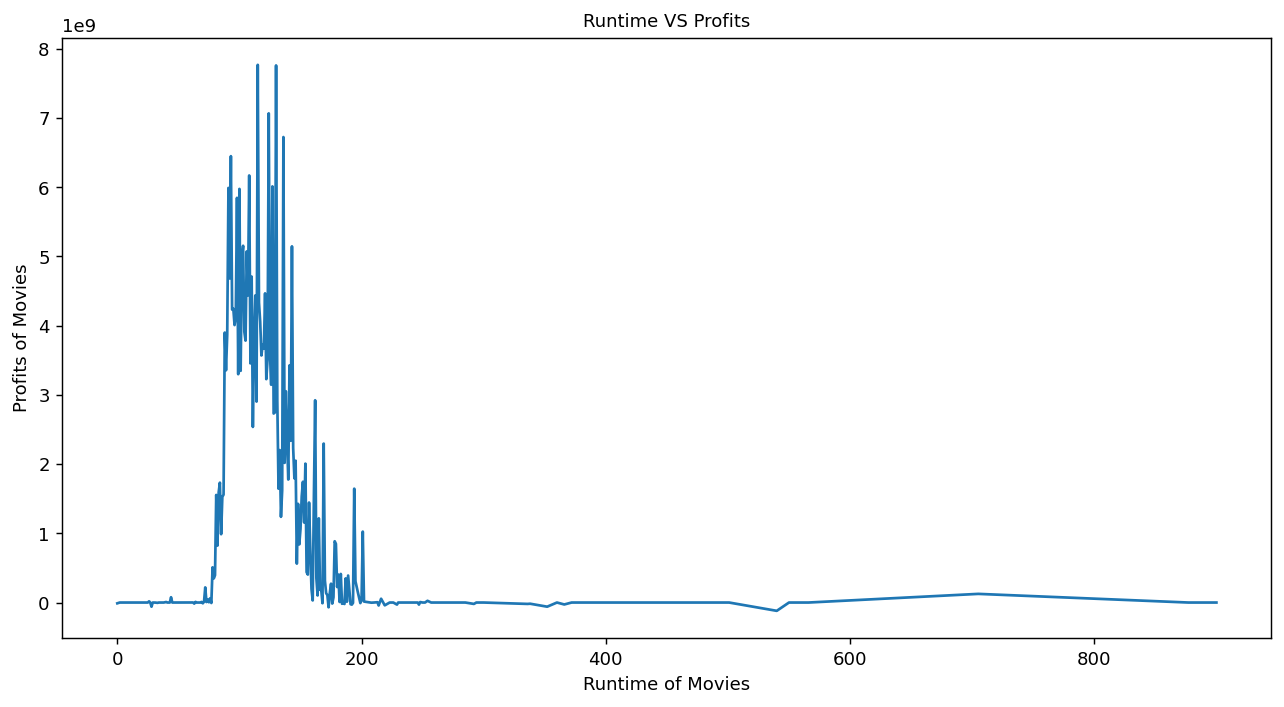

In [31]:
plt.figure(figsize=(12,6), dpi = 130)
df_run_pro.plot();
plt.xlabel('Runtime of Movies',size = 10 )
plt.ylabel('Profits of Movies',size = 10)
plt.title('Runtime VS Profits',size = 10);

#### So as our DIagram states the movies which have a runtime between 200 and nearly 100 is the movies with the best Profits
<hr>
<h3>Here we will try to see the corelation between Profits and Runtime</h3>

The Correlation between Profit of a movie and Its runtime: 0.6288272944785273


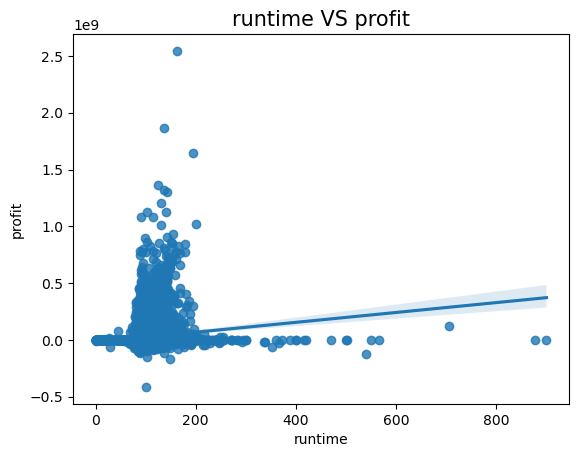

<Figure size 1200x600 with 0 Axes>

In [32]:
column1 = 'runtime'
column2 = 'profit'
drw(column1,column2)
print('The Correlation between Profit of a movie and Its runtime: {}'.format(df.corr().loc['popularity','profit']))

### Q6- Does Popular Movies bring high profits?

The Correlation between Popularity of a movie and Its profit: 0.6288272944785273


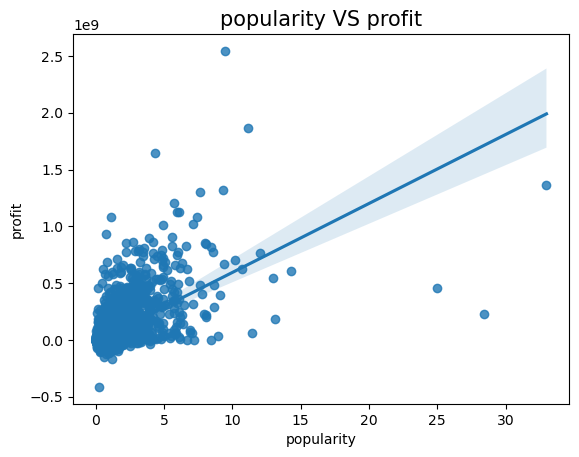

<Figure size 1200x600 with 0 Axes>

In [33]:
# pop_pro= sns.regplot(x=df['popularity'],y=df['profit'])
# pop_pro.set_title('Profits VS Popularity',fontsize=15)
# pop_pro.set_xlabel('Popularity',fontsize=10)
# pop_pro.set_ylabel('Profits',fontsize=10)
# sns.set(rc={'figure.figsize':(12,6)})
c1 = 'popularity'
c2 = 'profit'
drw(c1,c2)
print('The Correlation between Popularity of a movie and Its profit: {}'.format(df.corr().loc['popularity','profit']))

#### the Correlation is very high between popularity and profits

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

# Summary
<p>
So to sum our analysis we have gone through the movie list and found the most popular movie included,<br>
the relation between profits and popularity and the strong correlation between them,<br> 
also we got some statistics from the list as the year with the most short movies, <br>
the number of movies in each genre and the movie with the highest profit furthermore,<br>
    we gone through some analysis to get the year with the most revenue also, we enspected the relation between runtime and profits.
</p>

# Limitations
<ol>
    <li> the data contains many null values as in homepage, tagline, overview , ..etc which prevented the usage of the data list to it's full potintial </li>
    <li> the data contains many outliers as in runtime </li>
    <li> the data contains many budget and revenue values which are equal to zero which can be considered as missing as it also affects the quality of our analysis </li>
</ol>

# Reference
<ul>
    <li>https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html</li>
    <li>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html</li>
    <li>https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/</li>
    <li>https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html</li>
    <li>https://stackoverflow.com/questions/49059956/pandas-plot-value-counts-barplot-in-descending-manner</li>
    <li>https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot</li>
    Also Got some ideas from this github Project
    <li>https://github.com/hima888/Investigate-a-Dataset-TMDB-Movie-Data-/blob/master/investigate-a-dataset-template.ipynb</li>
    <li>https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/.ipynb_checkpoints/investigate-a-dataset-template-checkpoint.ipynb</li>
</ul>